<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/PDSH-cover-small.png?raw=1">

*This notebook contains an excerpt from the [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) by Jake VanderPlas; the content is available [on GitHub](https://github.com/jakevdp/PythonDataScienceHandbook).*

*The text is released under the [CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), and code is released under the [MIT license](https://opensource.org/licenses/MIT). If you find this content useful, please consider supporting the work by [buying the book](http://shop.oreilly.com/product/0636920034919.do)!*

<!--NAVIGATION-->
< [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb) | [Contents](Index.ipynb) | [Feature Engineering](05.04-Feature-Engineering.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/05.03-Hyperparameters-and-Model-Validation.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# 超參數與模型驗證

## 關於模型驗證(Model Validation)

模型驗證:選用一個模型以及它的超參數後，可以藉由把它套用到一些訓練的資料並比較它的預測結果和已知值，來評估它的效果。

### 錯誤的模型驗證方法

In [1]:
# 載入資料
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [2]:
# 使用KNN (N=1)
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=1)

In [3]:
# 訓練模型後去預測
model.fit(X, y)
y_model = model.predict(X)

In [4]:
# Accuracy竟然是100%?
from sklearn.metrics import accuracy_score
accuracy_score(y, y_model)

1.0

這個方法最大的問題是模型的訓練和驗證，使用的是同一組資料。

因此有作弊的嫌疑。

### 正確的模型驗證方式: Holdout sets (交叉)

Holdout set:把資料的子集合從模型的訓練資料中先保留下來，然後使用holdout set去檢查模型的效能。

In [6]:
from sklearn.model_selection import train_test_split
# 對每個集合切割50%的資料
X1, X2, y1, y2 = train_test_split(X, y, random_state=0,
                                  train_size=0.5)

# 對資料中其中一個集合進行模型擬合
model.fit(X1, y1)

# 使用另外一個集合的資料評估這個模型
y2_model = model.predict(X2)
accuracy_score(y2, y2_model)

0.9066666666666666

### 透過cross-validation進行模型驗證

使用holdout set做模型驗證有一個缺點，就是會在模型訓練中少了一部份的資料。cross validation可以改善這個缺點，資料的每個部份都要當作訓練集以及驗證集。

比較常用的是five-fold cross validation。

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-5-fold-CV.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#5-Fold-Cross-Validation)

把資料分成5組，輪流使用其中之一去評估其他4/5資料集的訓練結果，可使用``cross_val_score``做到:

In [7]:
from sklearn.model_selection import cross_val_score
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.96666667, 0.93333333, 0.93333333, 1.        ])

In [16]:
# Leaveoneout: 每個資料集都當成一組(常用在樣本數極少的情況下)
from sklearn.model_selection import LeaveOneOut
scores = cross_val_score(model, X, y, cv=LeaveOneOut())
scores

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [14]:
scores.mean()

0.96

## 選擇最佳的模型

核心問題:*如果評估後效能是不好的，應該朝向哪一個方向去修改*
以下是幾個可能的答案:
- 使用更複雜的/更有彈性的模型
- 使用比較不複雜的/比較沒有彈性的模型
- 收集更多訓練樣本
- 收集更多的資料加到每一個樣本的特徵中

### Bias-variance trade-off (偏差和變異的權衡)

最佳的模型:就是要在偏差和變異的取捨之間找到甜蜜點。

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-bias-variance.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Bias-Variance-Tradeoff)

這兩張圖都很清楚看到模型均不適合這組資料，但不適合的原因不相同:

左圖:低度擬合(Underfitting)，高bias

右圖:高度擬合(Overfitting)，高Variance

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-bias-variance-2.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Bias-Variance-Tradeoff-Metrics)

$R^2$測量一個模型在執行相對於一個簡單的目標值平均的好壞程度。 $R^2=1$代表完美符合 $R^2=0$代表模型的預測不會比簡單拿取資料的平均值還要好。
- 對高偏差模型，針對驗證資料集的效能和針對訓練資料集的效能是相同的
- 對高變異模型，針對驗證資料集的效能遠比針對訓練資料集的效能糟多了


![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-validation-curve.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Validation-Curve)

上圖被稱為*驗證曲線(validation curve)*, 可以從上圖看出幾個特點:
- 在任何時候訓練都比驗證高(這很正常，有擬合過比沒擬合過要來的好)
- 低模型複雜度(高偏差)的模型是一個預測能力不好的預測器
- 高模型複雜度(高變異)的模型在預測訓練資料預測能力好，但沒看過的資料容易預測能力差。
- 對一些中間值來說驗證曲線可以有一個最大值。此複雜程度就是在bias和variance之間做取捨。

### Scikit-Learn中的驗證曲線

這邊使用*多項式迴歸(polynomial regression)*，這是一般化的線性模型，其多項式階數(degree)是可以調整的參數。

例如: degree-1多項式擬合一條直線到資料

$$
y = ax + b
$$

degree-3多項式擬合一個立方曲線到資料

$$
y = ax^3 + bx^2 + cx + d
$$



In [17]:
# 一般化此方程式到任意數量的多項式特徵
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))

In [18]:
# 建立擬合模型的資料
import numpy as np

def make_data(N, err=1.0, rseed=1):
    # 隨機建立資料
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y

X, y = make_data(40)

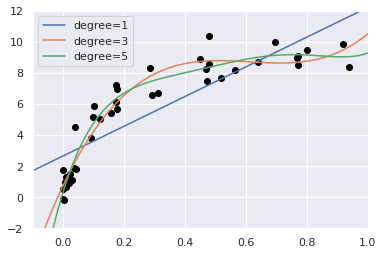

In [19]:
# 視覺化(階層越多複雜度越高)
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1, 3, 5]:
    y_test = PolynomialRegression(degree).fit(X, y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best');

看出訓練分數總是高於驗證分數，而訓練分數會隨著增加模型的複雜度持續改進，但驗證分數會在Overfitting前達到最高值，然後滑落

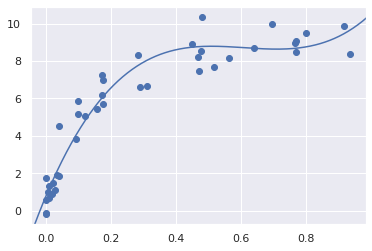

In [22]:
# 從驗證曲線可看出，在bias和variance間最佳的取捨點是在三階多項式，可計算以及顯示其在原始資料的擬合結果
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);

## 學習曲線(Learning Curves)

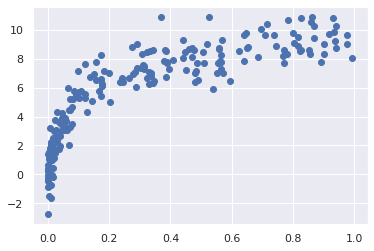

In [23]:
# 產生數量是5倍的資料集
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2);

實線新的結果，虛線之前資料集較小的結果。

可看出驗證曲線有2個重要的輸入:模型的複雜度、訓練集資料的數量。以訓練集大小來繪製出訓練/驗證分數的圖形被稱為學習曲線(learning curve)。

從學習曲線可預期以下的一般行為:
- 一個給定複雜度的模型將會對於一個小的資料集*過度擬合*: 表示訓練分數將會相對高，而驗證分數相對低。
- 一個給定複雜度的模型將會對於一個大的資料集*擬合不足*: 表示訓練分數將會降低，而驗證分數會增加。
- 模型不太可能驗證分數比訓練分數高，也就是不會有交叉的現象

所以預期一條用來檢視品質的學習曲線應為如下:

![](https://github.com/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/figures/05.03-learning-curve.png?raw=1)
[figure source in Appendix](06.00-Figure-Code.ipynb#Learning-Curve)

注意:當有足夠的資料可使特定模型收斂時，加上更多的訓練資料不會幫太多忙，因此要選擇增加模型複雜度以增加模型效能。

### 在Scikit-Learn中的學習曲線

使用一個2階多項式和9階多項式模型針對原始資料計算學習曲線:

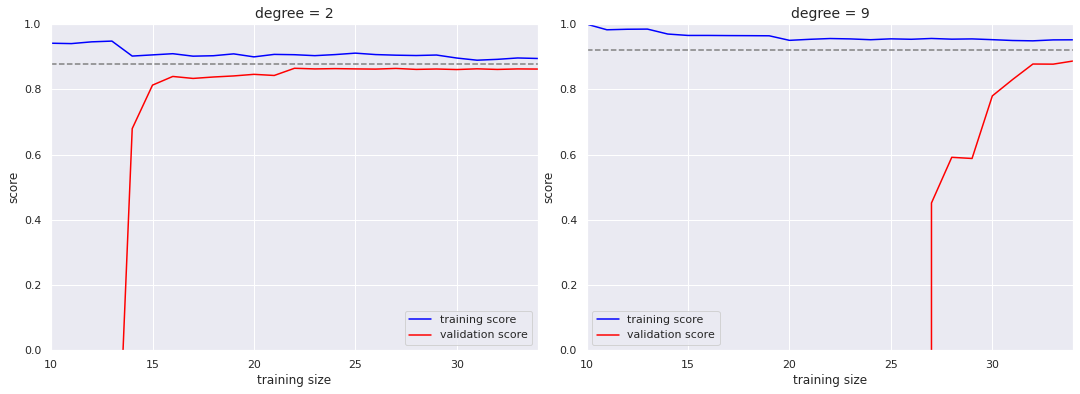

In [26]:
from sklearn.model_selection import learning_curve

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)

for i, degree in enumerate([2, 9]):
    N, train_lc, val_lc = learning_curve(PolynomialRegression(degree),
                                         X, y, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[i].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[i].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[i].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[i].set_ylim(0, 1)
    ax[i].set_xlim(N[0], N[-1])
    ax[i].set_xlabel('training size')
    ax[i].set_ylabel('score')
    ax[i].set_title('degree = {0}'.format(degree), size=14)
    ax[i].legend(loc='best')

左:當學習曲線已經收斂(訓練和驗證彼此已經很接近了)，增加更多訓練資料不會明顯增加模型效能。
右:增加模型複雜度，但要資料集增加到一定的狀況下才會收斂

## 驗證實務: 網格搜尋(Grid Search)

Scikit-Learn的grid_search模組可提供自動的工具去做到找尋最具有預測能力的超參數組合。可使用Scikit-Learn的``GridSearchCV``評估器:

In [28]:
# 定義要grid search的超參數
from sklearn.model_selection import learning_curve, GridSearchCV

param_grid = {'polynomialfeatures__degree': np.arange(21),
              'linearregression__fit_intercept': [True, False],
              'linearregression__normalize': [True, False]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7)

In [29]:
# 呼叫fit讓資料集在每一個格子點上擬合模型
grid.fit(X, y);

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [30]:
# 詢問最佳超參數組合
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


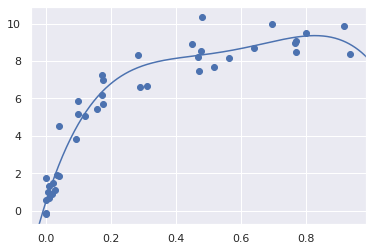

In [32]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test);
plt.axis(lim);